In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import requests
import bs4
import textblob

In [ ]:
wiki = requests.get("https://en.wikipedia.org/wiki/Bangladesh")

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
Bangladesh = BeautifulSoup(wiki.content,'lxml')

In [ ]:
Bangladesh = Bangladesh.getText(strip=True)

In [ ]:
Bangladesh

'Bangladesh - WikipediaJump to contentMain menuMain menumove to sidebarhideNavigationMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonateContributeHelpLearn to editCommunity portalRecent changesUpload fileLanguagesLanguage links are at the top of the page across from the title.SearchCreate accountLog inPersonal toolsCreate accountLog inPages for logged out editorslearn moreContributionsTalkContentsmove to sidebarhide(Top)1Etymology2HistoryToggle History subsection2.1Ancient Bengal2.2Islamic Bengal2.2.1Sultanate period2.2.2Mughal period2.3Colonial period2.4Partition of Bengal (1947)2.5Union with Pakistan2.6War of Independence2.6.1Atrocities2.7Modern Bangladesh2.7.1First parliamentary era2.7.2Presidential era (1975–1991)2.7.3Parliamentary era (1991–present)3GeographyToggle Geography subsection3.1Administrative divisions3.2Climate3.3Biodiversity4Politics and governmentToggle Politics and government subsection4.1Military4.2Foreign relations4.3Civil society4.4Human r

In [ ]:
import re

In [ ]:
Bangladesh = re.sub(r'\[\d+\]'," ",Bangladesh)

In [ ]:
Bangladesh = re.sub(r'\[\w+\]'," ", Bangladesh)

In [ ]:
Bangladesh = re.sub('[0-9]+'," ", Bangladesh)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.tokenize import sent_tokenize

In [ ]:
sentence = sent_tokenize(Bangladesh)

In [ ]:
len(sentence)

1904

In [ ]:
from textblob import TextBlob

In [ ]:
def analyse_sentiment(tweet):
  analysis=TextBlob(tweet)
  if analysis.sentiment.polarity>0:
    return 'positive'
  elif analysis.sentiment.polarity==0:
    return 'Neutral'
  else:
    return 'Negative'


In [ ]:
sentence=pd.DataFrame(sentence)

In [ ]:
sentence.columns=['sentence']

In [ ]:
sentence['sentiment']=[str(analyse_sentiment(x)) for x in sentence.sentence]

In [ ]:
sentence.sentiment.value_counts()

Neutral     1226
positive     507
Negative     171
Name: sentiment, dtype: int64

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
Banwords=word_tokenize(Bangladesh)

In [ ]:
Banwords = [word for word in Banwords if word.isalnum()]

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stop_words=set(stopwords.words('english'))

In [ ]:
banwords=[word for word in Banwords if not str.lower(word) in stop_words]

In [ ]:
from nltk.probability import FreqDist

In [ ]:
wordfreq = FreqDist(Banwords)

In [ ]:
wordfreq

FreqDist({'the': 1281, 'of': 987, 'and': 612, 'in': 568, 'Bangladesh': 470, 'to': 320, 'The': 264, 'a': 264, 'Retrieved': 233, 'on': 177, ...})

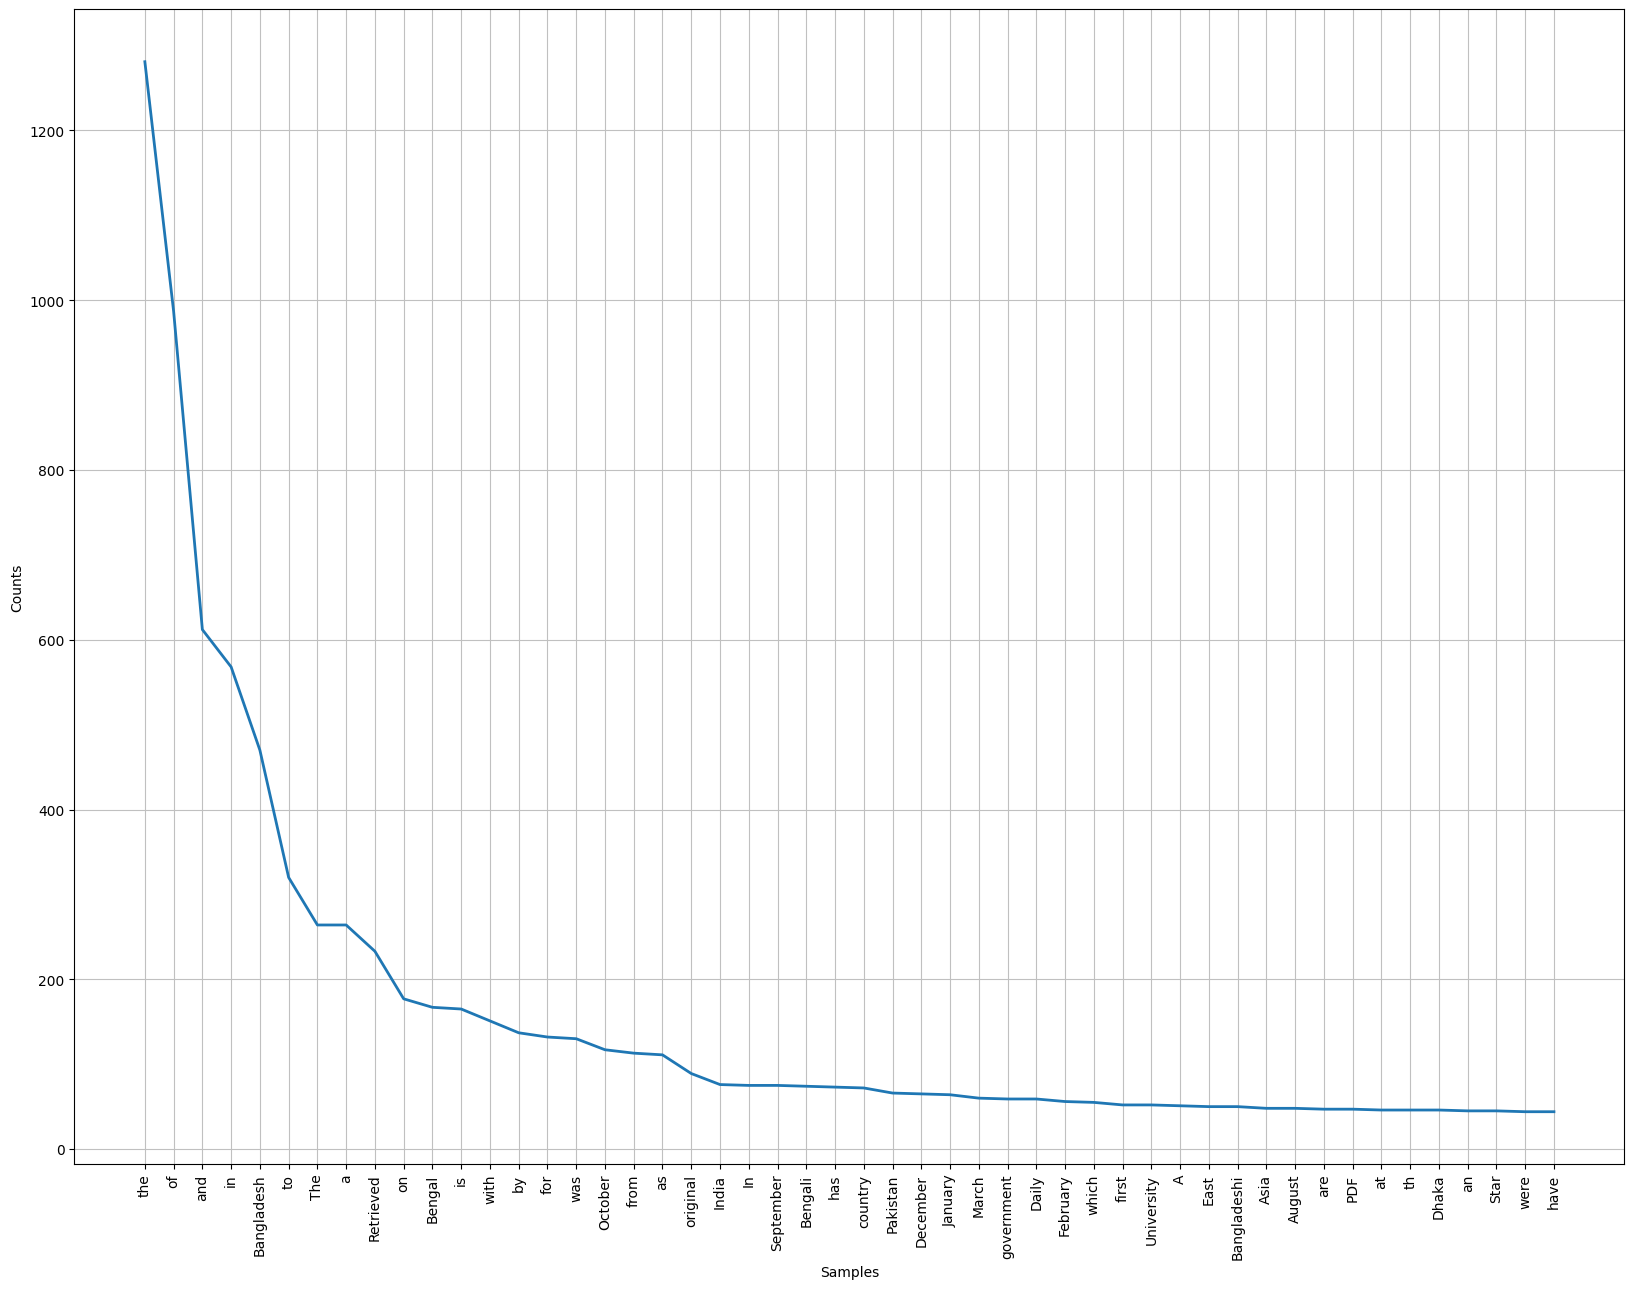

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
plt.figure(figsize=(20,15))
wordfreq.plot(50,cumulative=False)

In [ ]:
Banwords=[w for w in Banwords if not w in ['by','the','have','a','pdf','of','an']]

In [ ]:
from wordcloud import WordCloud

In [ ]:
ban_words=(" ").join(Banwords)

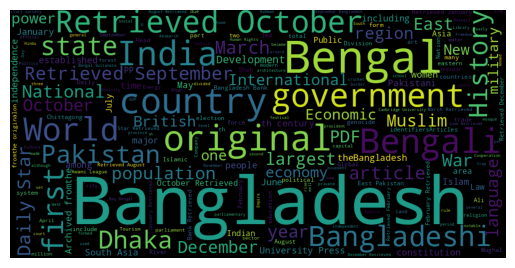

In [ ]:
wordcloud= WordCloud(width=1000,height=500).generate(ban_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()